## Big Data Mart

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('Bigmart.Train')
df_test = pd.read_csv('Bigmart.Test')

#### Training Data

In [3]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df_train.shape

(8523, 12)

In [5]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Handling Missing Value

In [7]:
df_train['Item_Weight'].mean()

12.857645184136183

In [8]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)

In [9]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
size = df_train.pivot_table(values ='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))

In [11]:
print(size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [12]:
missing_val = df_train['Outlet_Size'].isnull()
missing_val

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [13]:
df_train.loc[missing_val,'Outlet_Size'] = df_train.loc[missing_val,'Outlet_Type'].apply(lambda x: size)

In [14]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Description

In [15]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [16]:
sum(df_train['Item_Visibility']==0)

526

In [17]:
df_train.loc[:,'Item_Visibility'].replace([0],[df_train['Item_Visibility'].mean()],inplace=True)

In [18]:
sum(df_train['Item_Visibility']==0)

0

In [19]:
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
df_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:>

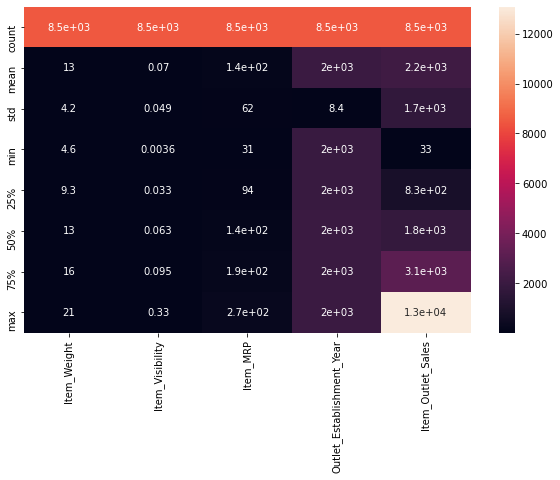

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(df_train.describe(),annot=True)

### Outcome of Description

 Description of df_train datset helps us to clean the data.

Item_weight - 1.Mean = 13, 2.Std = 4.2, 3.Min = 4.6, Max = 21

Item_Visibility - 1.Mean = 0.07, 2.Std = 0.049, 3.Min = 0.0036, Max = 0.33

Item_MRP- 1.Mean = 1.4e+0.2, 2.Std = 62, 3.Min = 31, Max = 2.7e+0.2

Outlet_Establishment_Year- 1.Mean = 2e+03, 2.Std = 8.4, 3.Min = 2e+03, Max = 2e+03

Item_Outlet_Sales - 1.Mean = 2.2e+03, 2.Std = 1.7e+03, 3.Min = 33, Max = 1.3e+04



### Correlation

In [21]:
df_train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.017450,0.024756,-0.008301,0.011550
Item_Visibility,-0.017450,1.000000,-0.005259,-0.078355,-0.134138
Item_MRP,0.024756,-0.005259,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.078355,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.134138,0.567574,-0.049135,1.000000


<AxesSubplot:>

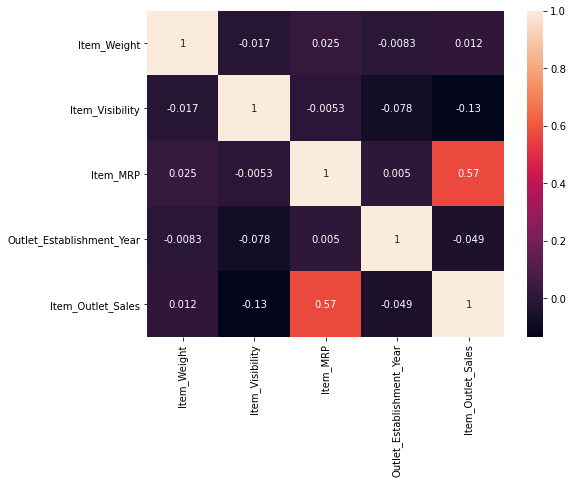

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(df_train.corr(),annot=True)

### Outcome of Correlation

From above heatmap we can see that Item_Weight and Item_MRP are positively correlaed with Item_Outlet_Sales. Item_Visibility and Outlet_Establishment_Year are negatively correlated with Item_Outlet_Sales.

Item_weight and Item_Visibility are 12 percent and 13 percent related with Item_Outlet_Sales resp.

Item_MRP are 57 percent correlated with Item_Outlet_Sales which consider to be a strong bond. Outlet_Establishment_Year are 49 percent correlated with Item_Outlet_Sales which consider to be a good bond.

### Exploratory Data Analysis

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

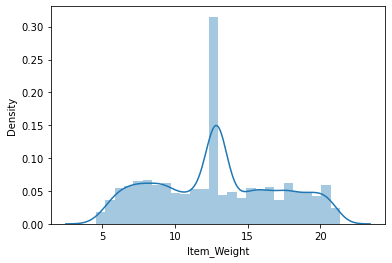

In [23]:
sns.distplot(df_train['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

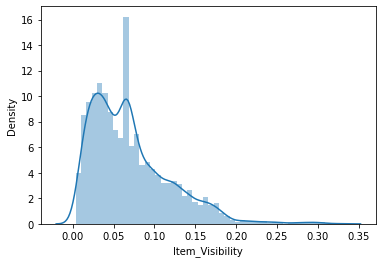

In [24]:
sns.distplot(df_train['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

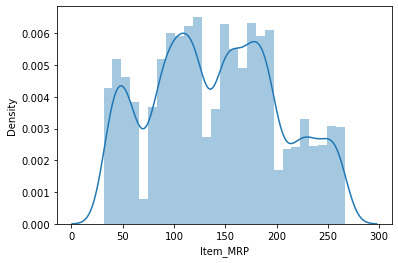

In [25]:
sns.distplot(df_train['Item_MRP'])

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

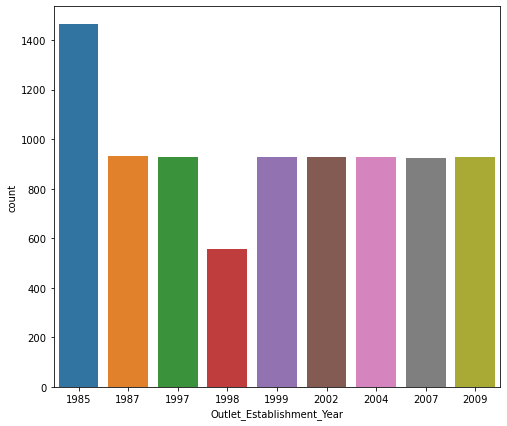

In [26]:
plt.figure(figsize=(8,7))
sns.countplot(df_train['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

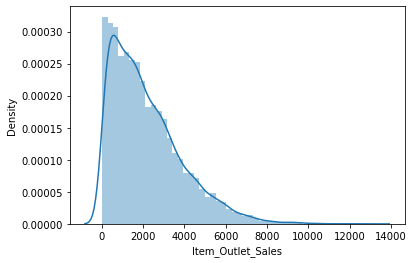

In [27]:
sns.distplot(df_train['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

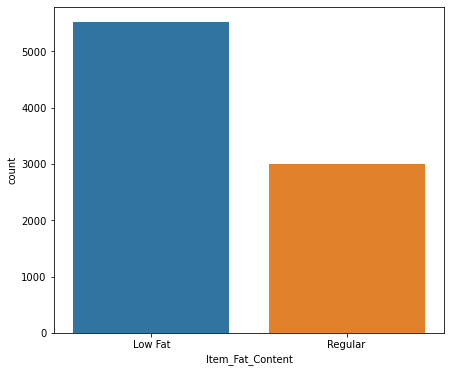

In [28]:
plt.figure(figsize=(7,6))
sns.countplot(df_train['Item_Fat_Content'])

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

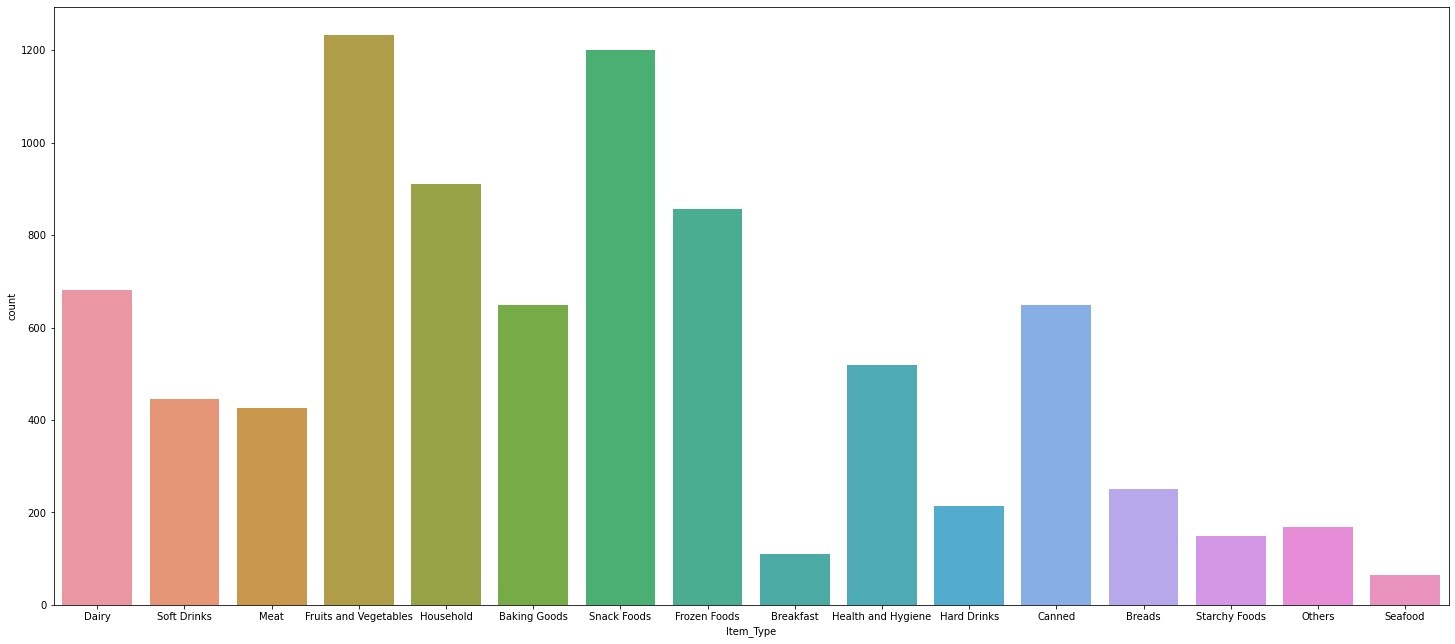

In [29]:
plt.figure(figsize=(25,11))
sns.countplot(df_train['Item_Type'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

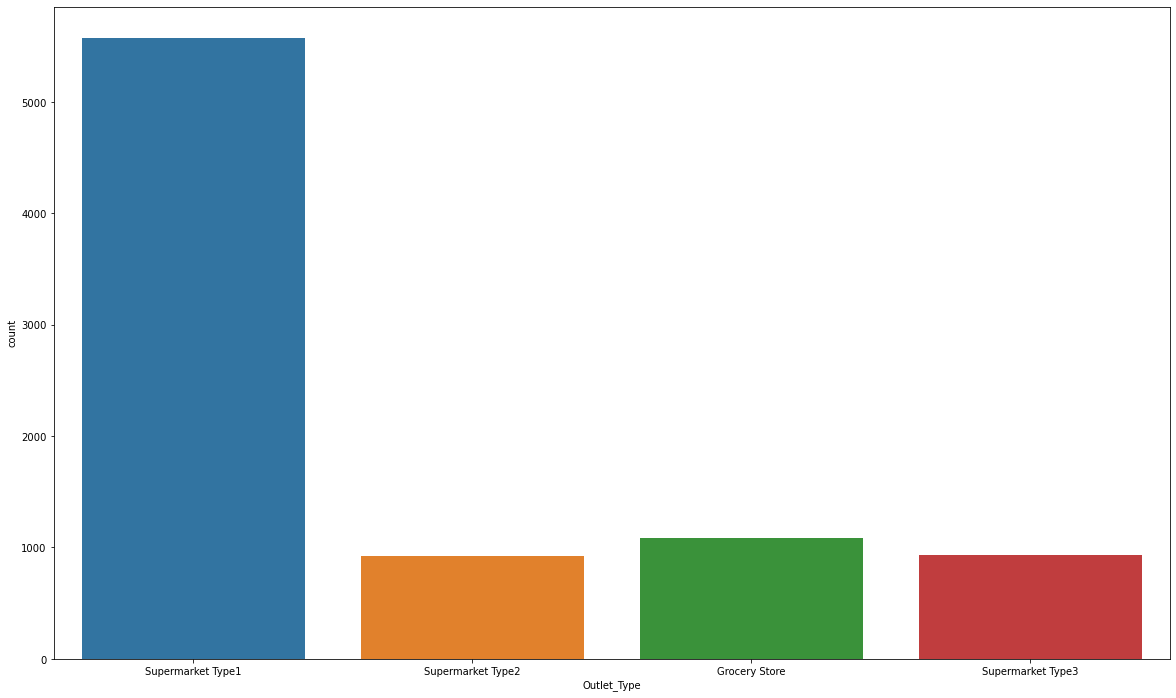

In [30]:
plt.figure(figsize=(20,12))
sns.countplot(df_train['Outlet_Type'])

### Data Conversion

In [31]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [32]:
df_train['Item_Identifier'] = enc.fit_transform(df_train['Item_Identifier'])
df_train['Item_Fat_Content'] = enc.fit_transform(df_train['Item_Fat_Content'])
df_train['Item_Type'] = enc.fit_transform(df_train['Item_Type'])
df_train['Outlet_Type'] = enc.fit_transform(df_train['Outlet_Type'])
df_train['Outlet_Location_Type'] = enc.fit_transform(df_train['Outlet_Location_Type'])
df_train['Outlet_Identifier'] = enc.fit_transform(df_train['Outlet_Identifier'])


In [33]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,Medium,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,Medium,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,Medium,0,1,2097.2700
3,1121,19.200,1,0.066132,6,182.0950,0,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,2,0,732.3800
4,1297,8.930,0,0.066132,9,53.8614,1,1987,High,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,High,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,Outlet_Type Grocery Store Supermarket Type1 Su...,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,Small,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,Medium,2,2,1845.5976


In [34]:
df_train.drop(columns='Outlet_Size',axis=1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,0,1,2097.2700
3,1121,19.200,1,0.066132,6,182.0950,0,1998,2,0,732.3800
4,1297,8.930,0,0.066132,9,53.8614,1,1987,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,2,2,1845.5976


### Skewness

In [35]:
df_train.skew().sort_values(ascending = False)

Item_Visibility              1.286877
Item_Outlet_Sales            1.177531
Outlet_Type                  0.927438
Item_Fat_Content             0.616705
Item_MRP                     0.127202
Item_Type                    0.101655
Item_Weight                  0.090561
Item_Identifier             -0.008877
Outlet_Identifier           -0.059861
Outlet_Location_Type        -0.209093
Outlet_Establishment_Year   -0.396641
dtype: float64

Outcome of the Skewness.

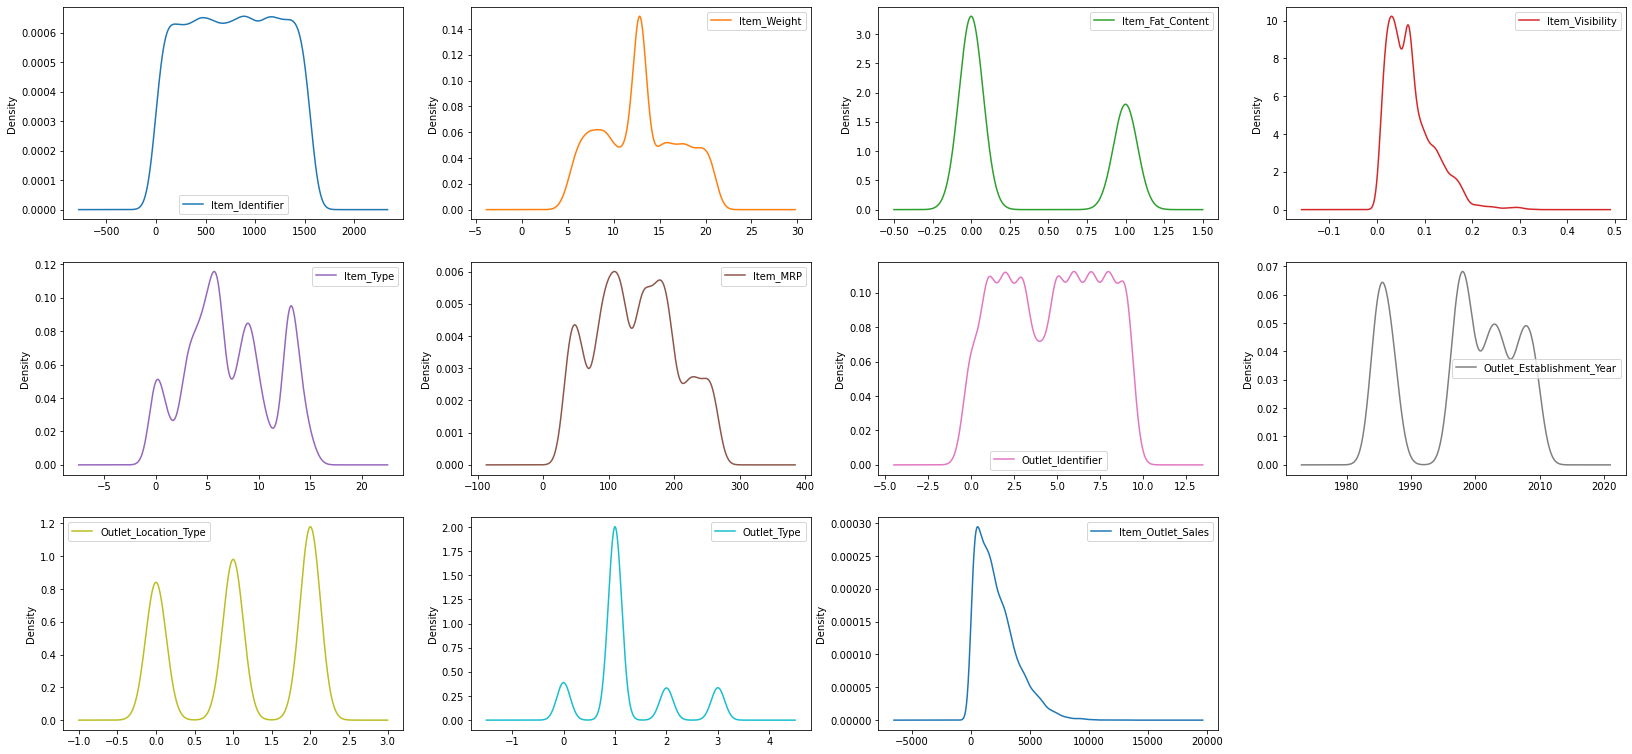

In [36]:
df_train.plot(kind = 'density',subplots = True,layout = (4,4),figsize = (28,18),sharex = False)
plt.show()

We can see the skewness in data for multiple columns.

In [37]:
df_train.skew().sort_values(ascending = False)

Item_Visibility              1.286877
Item_Outlet_Sales            1.177531
Outlet_Type                  0.927438
Item_Fat_Content             0.616705
Item_MRP                     0.127202
Item_Type                    0.101655
Item_Weight                  0.090561
Item_Identifier             -0.008877
Outlet_Identifier           -0.059861
Outlet_Location_Type        -0.209093
Outlet_Establishment_Year   -0.396641
dtype: float64

We can see Item_visibility have the highest Skewness and Outlet_Establishment_Year has lowest Skewness.

### Checking Outliers

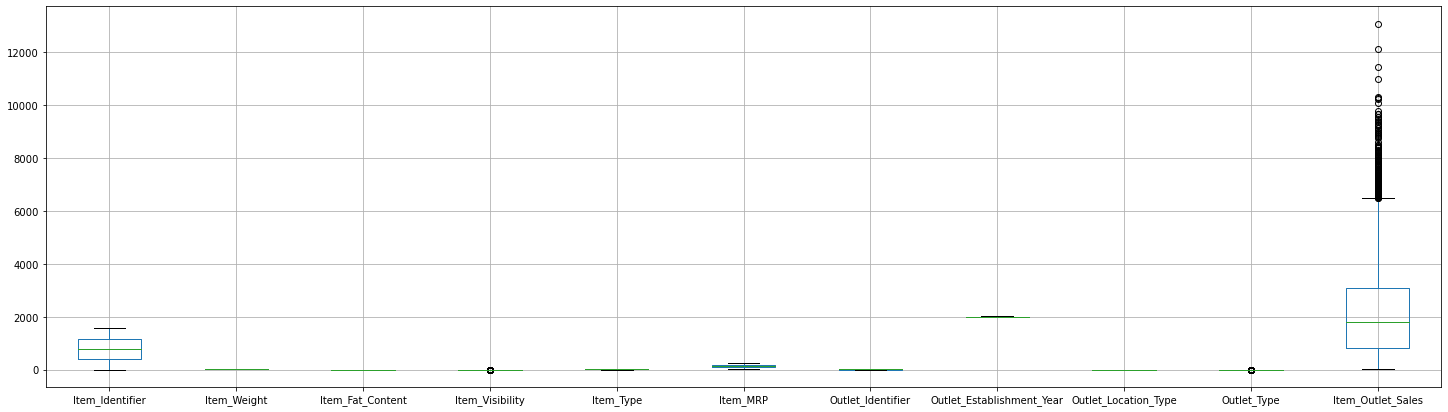

In [38]:
df_train.boxplot(figsize=(25,7))
plt.subplots
plt.show()

We can see that Item_Outlet_Sales have highest number of Outliers and Item_Visibility and Outlet_Type has one outlier each.
Other columns have zero number of Outliers.

### Splitting the Independent and Target variables in x and y

In [39]:
x = df_train.drop("Item_Outlet_Sales",axis=1)
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.016047,4,249.8092,9,1999,Medium,0,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,Medium,2,2
2,662,17.500,0,0.016760,10,141.6180,9,1999,Medium,0,1
3,1121,19.200,1,0.066132,6,182.0950,0,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,2,0
4,1297,8.930,0,0.066132,9,53.8614,1,1987,High,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,High,2,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,Outlet_Type Grocery Store Supermarket Type1 Su...,1,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,Small,1,1
8521,681,7.210,1,0.145221,13,103.1332,3,2009,Medium,2,2


In [40]:
y = df_train["Item_Outlet_Sales"]
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

#### Testing Data

In [41]:
df_test = pd.read_csv("Bigmart.Test")
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [42]:
df_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [43]:
df_test.shape

(5681, 11)

In [44]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

We can see that dataset have null values in two columns, Item_weight and Outlet_Size.

In [45]:
df_test['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [46]:
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat')

In [47]:
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace('reg','Regular')

In [48]:
df_test['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

### Filling Null Values

In [49]:
Item_Identifier_Weight = df_test.pivot_table(values='Item_Weight',index = 'Item_Type')
Item_Identifier_Weight

,Item_Weight
Item_Type,
Baking Goods,12.272418
Breads,10.866799
Breakfast,13.759603
Canned,12.393565
Dairy,12.955040
Frozen Foods,12.101543
Fruits and Vegetables,13.146659
Hard Drinks,11.844417
Health and Hygiene,13.216929


In [50]:
missing_Item_Weight = df_test['Item_Weight'].isnull()

In [51]:
for i, item in enumerate(df_test['Item_Type']):
    if missing_Item_Weight[i]:
        df_test['Item_Weight'][i] = Item_Identifier_Weight.loc[item]['Item_Weight']

In [52]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### Filling Null Values in Outlet Size

In [53]:
Outlet_Type_Size = df_test.pivot_table(values='Outlet_Size',columns = 'Outlet_Type',aggfunc=(lambda x : x.mode()))
Outlet_Type_Size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [54]:
missing_Outlet_Size = df_test['Outlet_Size'].isnull()

In [55]:
df_test.loc[missing_Outlet_Size,'Outlet_Size'] = df_test.loc[missing_Outlet_Size,'Outlet_Type'].apply(lambda x : Outlet_Type_Size[x])

In [56]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

There is no missing values in Dataset.

In [57]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.694378,0.065684,141.023273,1997.828903
std,4.252967,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.684256,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [58]:
df_test[df_test['Item_Visibility']==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
56,FDA09,13.350000,Regular,0.0,Snack Foods,179.6660,OUT013,1987,High,Tier 3,Supermarket Type1
90,FDN39,19.350000,Regular,0.0,Meat,165.7816,OUT045,2002,Small,Tier 2,Supermarket Type1
109,FDU14,17.750000,Low Fat,0.0,Dairy,249.7750,OUT018,2009,Medium,Tier 3,Supermarket Type2
125,FDZ36,12.272418,Regular,0.0,Baking Goods,186.4240,OUT027,1985,Medium,Tier 3,Supermarket Type3
140,DRF48,5.730000,Low Fat,0.0,Soft Drinks,188.3898,OUT010,1998,Small,Tier 3,Grocery Store
...,...,...,...,...,...,...,...,...,...,...,...
5643,FDQ19,13.146659,Regular,0.0,Fruits and Vegetables,244.3512,OUT019,1985,Small,Tier 1,Grocery Store
5648,FDK26,12.393565,Regular,0.0,Canned,187.5240,OUT027,1985,Medium,Tier 3,Supermarket Type3
5654,FDQ57,7.275000,Low Fat,0.0,Snack Foods,144.5760,OUT013,1987,High,Tier 3,Supermarket Type1
5661,DRG37,11.691965,Low Fat,0.0,Soft Drinks,155.7972,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [59]:
df_test['Item_Visibility'].replace(0,0.066132,inplace=True)